# **About Dataset**

This **synthetic healthcare dataset** has been meticulously curated to cater to data science, machine learning, and data analysis enthusiasts seeking a practical resource within the healthcare domain. Created to mirror real-world healthcare data, it serves as a platform for honing data manipulation and analytical skills, aiming to facilitate the development and demonstration of expertise in **healthcare analytics**. The dataset, inspired by the scarcity of diverse and accessible healthcare data for educational and research purposes, employs Python's Faker library to replicate the structure and attributes commonly found in healthcare records. 

By providing this synthetic yet comprehensive dataset, the intention is to **encourage innovation, learning, and knowledge exchange within the healthcare analytics field**. It offers a versatile range of applications, including the development and testing of predictive models, practicing data cleaning and analysis techniques, crafting data visualizations to unearth healthcare trends, and serving as a valuable educational resource for comprehending data science and machine learning concepts, particularly in the context of healthcare. Moreover, it can be treated as a **Multi-Class Classification Problem**, focusing on predicting outcomes in the **`Test Results`** category, encompassing three distinct classes: **'Normal,' 'Abnormal,' and 'Inconclusive.'**

Detailed Dataset Information comes from https://www.kaggle.com/datasets/prasad22/healthcare-dataset:
1. **`Name`**: This column represents the name of the patient associated with the healthcare record.
2. **`Age`**: The age of the patient at the time of admission, expressed in years.
3. **`Gender`**: Indicates the gender of the patient, either "Male" or "Female."
4. **`Blood Type`**: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).
5. **`Medical Condition`**: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.
6. **`Date of Admission`**: The date on which the patient was admitted to the healthcare facility.
7. **`Doctor`**: The name of the doctor responsible for the patient's care during their admission.
8. **`Hospital`**: Identifies the healthcare facility or hospital where the patient was admitted.
9. **`Insurance Provider`**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."
10. **`Billing Amount`**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
11. **`Room Number`**: The room number where the patient was accommodated during their admission.
12. **`Admission Type`**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.
13. **`Discharge Date`**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.
14. **`Medication`**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."
15. **`Test Results`**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

# **Data Understanding**

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
df = pd.read_csv('healthcare_dataset.csv')

In [267]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [268]:
df.shape

(10000, 15)

There are **10,000** observations or data points, each characterized by **15** different features or variables.

In [269]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [271]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

The **absence of null values** within the dataset signifies a **high-quality** and **well-maintained dataset**, contributing to its cleanliness and reliability for analytical purposes. The lack of null values or missing data points across the observations ensures that each data point contains complete information for all variables. This aspect is fundamental in data analysis and modeling as it allows for a comprehensive exploration of relationships between variables and facilitates the application of machine learning algorithms **without** the need for **imputation** or **handling missing data** strategies. 

### Numerical Data 

For numerical columns such as **`Age`, `Billing Amount`, and `Room Number`**, various data preprocessing steps can be applied:

**1. Handling Outliers:** To identify outliers, statistical techniques like calculating summary statistics (mean, median, standard deviation, quartiles) and visual methods like box plots can be used.

In [272]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


1. **Age:**
   - The average age of patients in this dataset is approximately 51.45 years, with a standard deviation of about 19.59 years.
   - The youngest patient is 18 years old, while the oldest patient is 85 years old.
   - The majority of patients fall within the range of 35 to 68 years old, as indicated by the interquartile range (25th to 75th percentile).
   
   
2. **Billing Amount:**
   - The average billing amount for healthcare services during admission is around 25,516.81 monetary units.
   - The standard deviation of approximately 14,067.29 suggests a considerable variation in the billed amounts.
   - The minimum billed amount is 1000.18, while the maximum billed amount is 49,995.90.
   - The range of billed amounts spans from a minimum of 1000.18 to a maximum of 49,995.90, reflecting diverse costs for healthcare services among patients.
   
   
3. **Room Number:**
   - Room numbers range from 101 to 500, indicating a diverse range of accommodations utilized during patients' admissions.

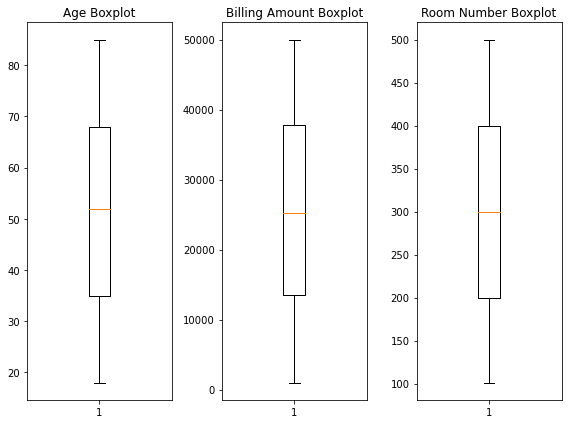

In [273]:
plt.figure(figsize = (8, 6))

plt.subplot(1, 3, 1)
plt.boxplot(df['Age'])
plt.title('Age Boxplot')

plt.subplot(1, 3, 2)
plt.boxplot(df['Billing Amount'])
plt.title('Billing Amount Boxplot')

plt.subplot(1, 3, 3)
plt.boxplot(df['Room Number'])
plt.title('Room Number Boxplot')

plt.tight_layout()
plt.show()

The boxplots for **'Age,' 'Billing Amount,' and 'Room Number'** columns display **no visible outliers**, indicating that there are no data points significantly distant from the central distribution of the data. In each boxplot, the absence of individual data points beyond the whiskers (the lines extending from the boxes) suggests that there are no extreme values lying outside the typical range of the data. This absence of outliers implies a more consistent and less skewed distribution within these numerical columns, contributing to a **more stable and reliable dataset** for subsequent analysis or modeling tasks.

**2. Assessing Data Spread:** Histograms provide a visual representation of the distribution of numerical data. Histograms help in understanding the range, distribution shape (normal, skewed), and concentration of data points within different value ranges.

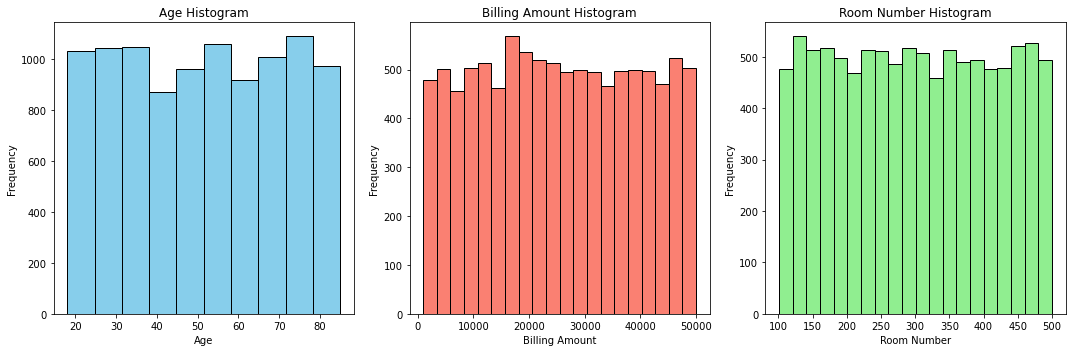

In [274]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

axes[0].hist(df['Age'], bins = 10, color = 'skyblue', edgecolor = 'black')
axes[0].set_title('Age Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Billing Amount'], bins = 20, color = 'salmon', edgecolor = 'black')
axes[1].set_title('Billing Amount Histogram')
axes[1].set_xlabel('Billing Amount')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['Room Number'], bins = 20, color = 'lightgreen', edgecolor = 'black')
axes[2].set_title('Room Number Histogram')
axes[2].set_xlabel('Room Number')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms for **`Age`**, **`Billing Amount`**, and **`Room Number`** columns exhibit a **symmetric** and **bell-shaped pattern**, suggesting an approximate **normal distribution** without noticeable skewness. This observation implies a balanced distribution around the mean, indicating a lack of significant outliers or extreme values within the data.

### Categorical Data 

The `value_counts()` method provides a quick summary of unique categories in a categorical feature along with their respective frequencies. It helps understand the distribution, prevalence, and balance of different categories within the dataset. This insight aids in detecting biases, outliers, and guiding preprocessing or modeling decisions for categorical data.

In [275]:
df['Name'].value_counts()

Michael Johnson        7
James Johnson          6
Michael Miller         4
Michelle Williams      4
Scott Smith            4
                      ..
Sharon Rose            1
Stephanie Knox         1
Anthony Jones          1
Melissa Perkins DVM    1
Eric King              1
Name: Name, Length: 9378, dtype: int64

The provided data shows the count of occurrences for each unique name listed in the `Name` column of the dataset. It reveals that certain names like **"Michael Johnson," "James Johnson," "Michael Miller," "Michelle Williams," and "Scott Smith"** appear more frequently than others, with "Michael Johnson" being the most common, occurring seven times. This indicates that some names are more prevalent, while others appear only once in the dataset.

In [276]:
df['Gender'].value_counts()

Female    5075
Male      4925
Name: Gender, dtype: int64

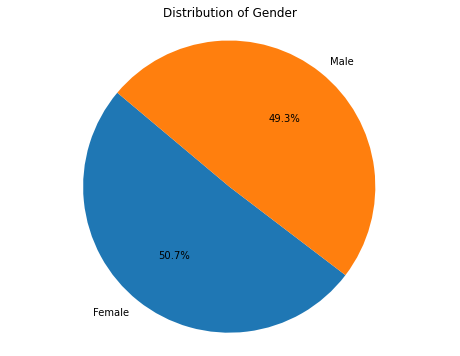

In [277]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender') 
plt.axis('equal') 
plt.show()

The **`Gender`** column in the healthcare dataset shows a near-even split between **'Female'** and **'Male'** categories, with approximately **5,075** instances classified as **'Female'** and **4,925** instances classified as **'Male.'** This balanced distribution indicates an equitable representation of genders within the dataset, providing a well-rounded basis for analyses and modeling in healthcare.

In [278]:
df['Blood Type'].value_counts()

AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64

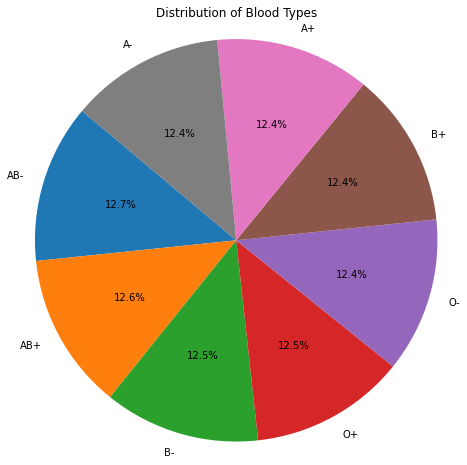

In [279]:
blood_type_counts = df['Blood Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(blood_type_counts, labels=blood_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Blood Types')
plt.axis('equal')
plt.show()

Collectively, these **`blood types`** together encompass the entire dataset, each contributing almost **equally** to the overall distribution of blood types. The counts and percentages illustrate a relatively balanced representation of different blood types within the healthcare dataset, indicating a **diverse population** or **sample concerning blood type variations**. This information is essential in various medical contexts, such as blood transfusions, compatibility assessments, and understanding blood-related conditions, where the prevalence of specific blood types could be significant.

In [280]:
df['Medical Condition'].value_counts()

Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64

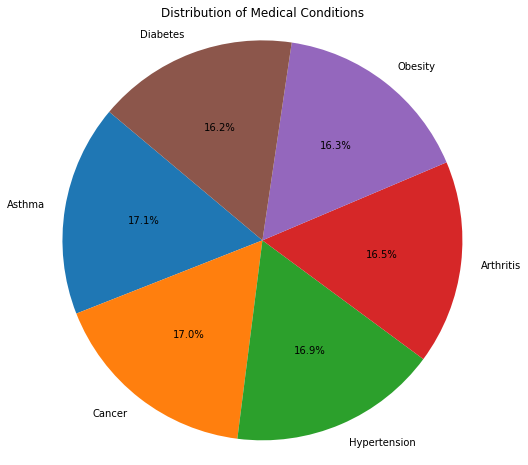

In [281]:
medical_condition_counts = df['Medical Condition'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(medical_condition_counts, labels=medical_condition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medical Conditions')
plt.axis('equal')
plt.show()

These counts and percentages elucidate the distribution and prevalence of various medical conditions within the dataset. The data showcases a **fairly close occurrence** of different medical conditions, **none substantially dominating** the dataset. This insight is crucial for healthcare analytics, as it presents a diverse array of prevalent medical conditions, aiding in identifying key health concerns or patterns within the studied population.

In [282]:
df['Date of Admission'].value_counts()

2019-04-12    15
2022-04-27    15
2021-10-23    14
2023-03-27    14
2022-10-01    14
              ..
2022-07-16     1
2022-06-15     1
2022-12-11     1
2022-10-28     1
2019-09-23     1
Name: Date of Admission, Length: 1815, dtype: int64

The **`Date of Admission`** column showcases various admission dates with differing frequencies. For instance:
- **April 12, 2019, and April 27, 2022:** These dates have the highest number of admissions, each with 15 occurrences, indicating days with notably higher patient intake compared to other days.
- **October 23, 2021, March 27, 2023, October 1, 2022:** These dates also exhibit a relatively high number of admissions, each having 14 occurrences, suggesting days with increased patient admissions.
- **Diverse Admission Frequency:** The dataset encompasses 1815 unique admission dates, ranging from days with a substantial number of admissions to dates with only one recorded admission.

This insight portrays the variability in admission frequency across different dates. Some dates experienced notably higher patient admissions, potentially indicating peaks or specific events affecting hospital admissions, while others had relatively lower or singular admissions throughout the dataset. Understanding these variations can be crucial for hospital management in resource allocation and planning based on peak admission days or identifying trends in patient intake.

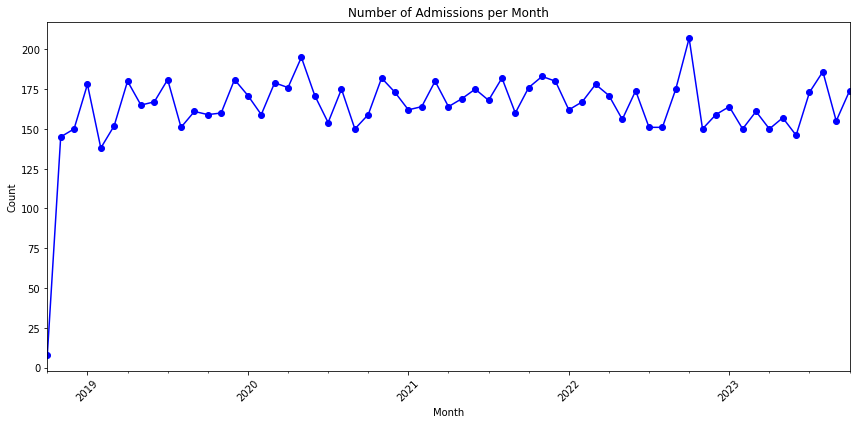

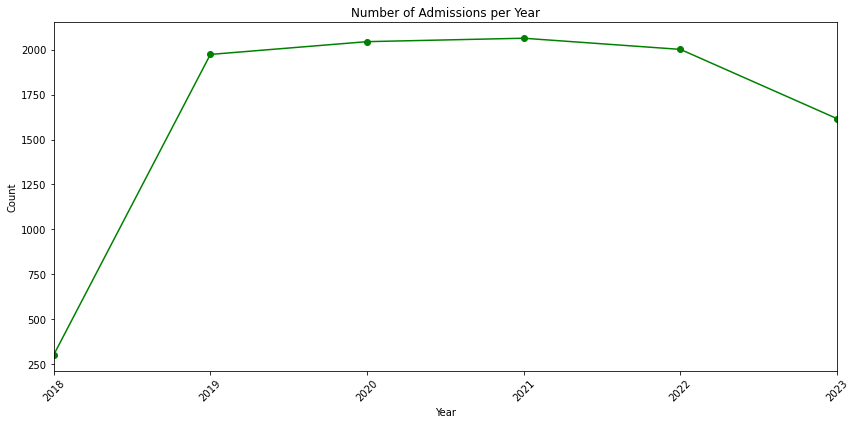

In [283]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
admission_dates_monthly = df['Date of Admission'].groupby(df['Date of Admission'].dt.to_period('M')).agg('count')
admission_dates_yearly = df['Date of Admission'].groupby(df['Date of Admission'].dt.to_period('Y')).agg('count')

plt.figure(figsize=(12, 6))
admission_dates_monthly.plot(kind='line', marker='o', color='blue')
plt.title('Number of Admissions per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
admission_dates_yearly.plot(kind='line', marker='o', color='green')
plt.title('Number of Admissions per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [284]:
df['Doctor'].value_counts()

Michael Johnson      7
Robert Brown         5
Michelle Anderson    5
Matthew Smith        5
Jennifer Smith       5
                    ..
Sandra Howard        1
Steven Fuller        1
Benjamin Lawson      1
Allison Woods        1
Tasha Avila          1
Name: Doctor, Length: 9416, dtype: int64

The data reveals the distribution of patient records among various **`doctors`** in the dataset. **Michael Johnson** holds the highest number of patient records, totaling **7** instances, suggesting a prominent association with patient care. **Doctors Robert Brown, Michelle Anderson, Matthew Smith, and Jennifer Smith** each have **5** patient records, indicating substantial involvement but fewer patient records compared to Michael Johnson. The dataset includes **9416 unique doctors**, displaying a range from those handling several patient records to others with only one record attributed to them. This diverse distribution sheds light on varying levels of involvement among doctors, providing insight into their patient caseloads within the healthcare dataset.

In [285]:
df['Hospital'].value_counts()

Smith PLC                        19
Smith and Sons                   17
Smith Ltd                        14
Smith Inc                        14
Johnson PLC                      13
                                 ..
Daniel-Benton                     1
Franco, Hicks and Anderson        1
Berry PLC                         1
Martinez, Johnson and Carlson     1
Torres, Young and Stewart         1
Name: Hospital, Length: 8639, dtype: int64

The data presents the distribution of patient records among various **`hospitals`** in the dataset. Hospitals like **Smith PLC, Smith and Sons, Smith Ltd, and Smith Inc** exhibit relatively higher counts of patient records, ranging from **14 to 19** instances, indicating a more significant association with patient admissions or healthcare services within the dataset. **Johnson PLC** follows closely with **13** patient records. However, there are **8639 unique hospitals** represented in the dataset, showcasing diverse counts of patient records attributed to each. This variability suggests varying levels of activity or patient admissions across different hospitals, where some have a more substantial presence with higher patient record counts, while others show fewer instances associated with them, reflecting differing levels of engagement within the healthcare dataset.

In [286]:
df['Insurance Provider'].value_counts()

Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Insurance Provider, dtype: int64

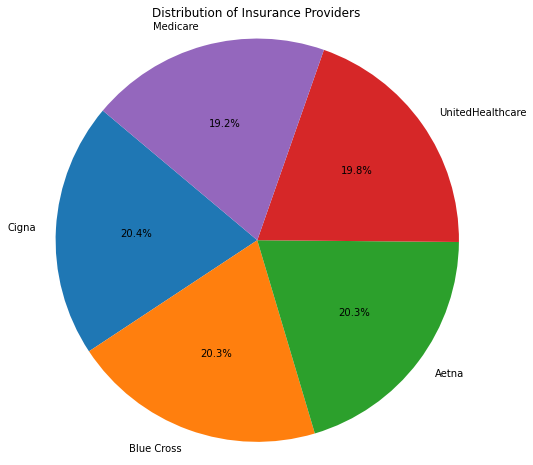

In [287]:
insurance_provider_counts = df['Insurance Provider'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(insurance_provider_counts, labels=insurance_provider_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Insurance Providers')
plt.axis('equal')
plt.show()

The data reflects a relatively balanced distribution among these major **`insurance providers`** within the dataset. **Cigna, Blue Cross, and Aetna** lead with a **similar percentage** of representation, followed closely by **UnitedHealthcare and Medicare**, suggesting a **fairly even distribution** of patients among these key insurance providers.

In [288]:
df['Admission Type'].value_counts()

Urgent       3391
Emergency    3367
Elective     3242
Name: Admission Type, dtype: int64

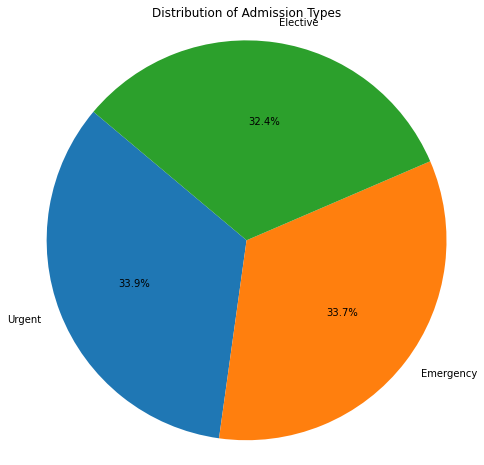

In [289]:
admission_type_counts = df['Admission Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(admission_type_counts, labels=admission_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Admission Types')
plt.axis('equal')
plt.show()

The data reflects a relatively **balanced distribution** among these major **`admission types`** within the dataset. **Urgent and Emergency** admissions hold **similar** percentages, with **Elective** admissions **slightly behind** but still maintaining a notable representation. This insight showcases the relative frequency of different admission types, portraying the diversity in reasons for patient admissions recorded in the dataset.

In [290]:
df['Discharge Date'].value_counts()

2021-11-28    14
2020-10-08    13
2020-10-18    13
2022-08-17    13
2021-03-23    13
              ..
2018-11-16     1
2019-02-19     1
2018-12-27     1
2020-12-25     1
2023-11-27     1
Name: Discharge Date, Length: 1834, dtype: int64

The provided data illustrates the count of patient discharge dates within the dataset. Here's a concise overview:
- **November 28, 2021:** Represents the discharge date with the highest frequency of occurrences, noted 14 times in the dataset, indicating a notable number of patients discharged on this specific date.
- **October 8, 2020, October 18, 2020, August 17, 2022, March 23, 2021:** These dates also demonstrate a relatively high frequency of patient discharges, each recorded 13 times in the dataset, suggesting days with a substantial number of patients discharged.
- **Diverse Discharge Dates:** The dataset encompasses 1834 unique discharge dates, showcasing varying occurrences for each date, ranging from dates with a high number of patient discharges to those with only one recorded discharge.

This data insight provides an overview of the distribution of patient discharges across different dates. It highlights specific dates where a notable number of patients were discharged, potentially indicating peaks in discharge activities or significant events related to patient care within the healthcare dataset.

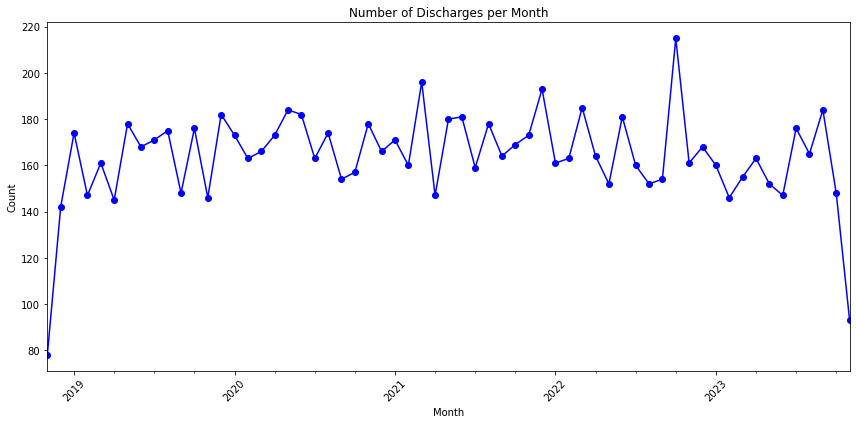

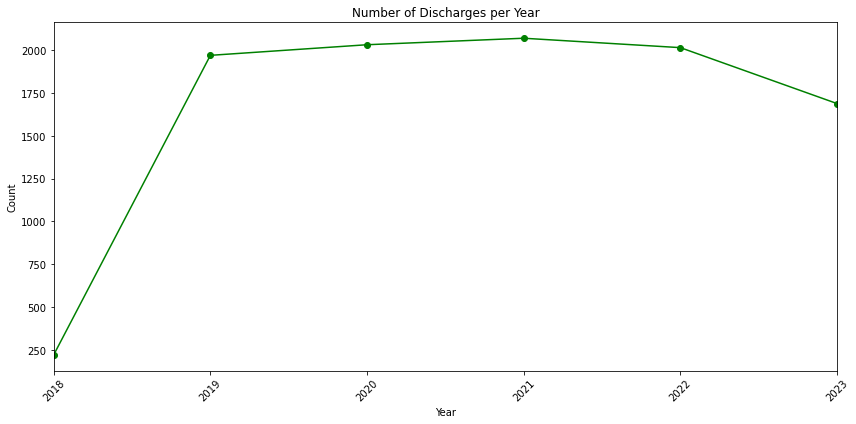

In [291]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
discharge_dates_monthly = df['Discharge Date'].groupby(df['Discharge Date'].dt.to_period('M')).agg('count')
discharge_dates_yearly = df['Discharge Date'].groupby(df['Discharge Date'].dt.to_period('Y')).agg('count')

plt.figure(figsize=(12, 6))
discharge_dates_monthly.plot(kind='line', marker='o', color='blue')
plt.title('Number of Discharges per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
discharge_dates_yearly.plot(kind='line', marker='o', color='green')
plt.title('Number of Discharges per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [292]:
df['Medication'].value_counts()

Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: Medication, dtype: int64

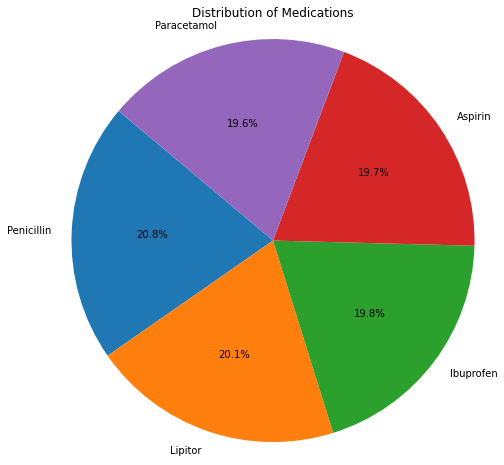

In [293]:
medication_counts = df['Medication'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(medication_counts, labels=medication_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medications')
plt.axis('equal')
plt.show()

The data showcases a **balanced distribution** among these major **`medications`** within the dataset. **Penicillin, Lipitor, Ibuprofen, Aspirin, and Paracetamol** all hold comparable percentages, indicating **similar** frequencies of administration or prescription. Understanding these percentages aids in recognizing the prevalence of specific medications in the dataset, providing insights into their usage frequency among the recorded medication instances.

In [294]:
df['Test Results'].value_counts()

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64

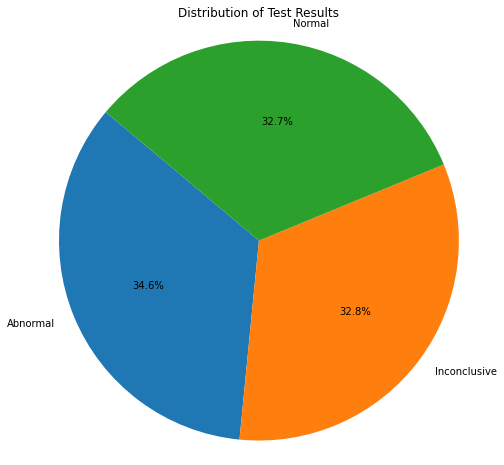

In [295]:
test_results_counts = df['Test Results'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(test_results_counts, labels=test_results_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Test Results')
plt.axis('equal')
plt.show()

These **`Test Results`** demonstrate a **relatively balanced** distribution among **Abnormal, Inconclusive, and Normal** outcomes within the dataset. Abnormal Test Results lead with the highest frequency, followed closely by Inconclusive, and then Normal results. Understanding these percentages provides insights into the prevalence and distribution of various Test Result outcomes, offering a view of their relative occurrence among the recorded instances of Test Results.

# **Feature Selection and Manipulation**

In the process of preparing data for predictive modeling, it's crucial to identify and retain only the columns (features) that are directly relevant to the prediction task while excluding those that do not contribute meaningful information or context to the outcome variable of interest. In this specific dataset scenario, columns such as **`Name`, `Doctor`, `Hospital`, `Insurance Provider`, and `Room Number`** are considered **irrelevant** or **non-informative** in predicting the 'Test Results.' These columns contain information that doesn't inherently influence or provide insight into the medical condition or outcome being predicted.

Consequently, dropping these columns before modeling is a necessary step to streamline the dataset, reduce noise, improve model efficiency, and ensure that the predictive model focuses solely on relevant information associated with the 'Test Results' while disregarding extraneous or unrelated factors. This practice adheres to the principle of feature selection or column exclusion based on their lack of direct impact on the target variable, ultimately enhancing the model's accuracy and interpretability.

In [296]:
df = df.drop(['Name', 'Doctor', 'Hospital', 'Insurance Provider', 'Room Number'], axis = 1)
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,81,Female,O-,Diabetes,2022-11-17,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive
1,35,Male,O+,Asthma,2023-06-01,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,61,Male,B-,Obesity,2019-01-09,36874.896997,Emergency,2019-02-08,Lipitor,Normal
3,49,Male,B-,Asthma,2020-05-02,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,51,Male,O-,Arthritis,2021-07-09,18086.344184,Urgent,2021-08-02,Paracetamol,Normal


Converting **`Date of Admission`** and **`Discharge Date`** columns involves calculating the difference between these dates to determine the total duration of a patient's hospital stay. This transformation creates a new feature representing the length of stay, offering valuable insights into patient timelines and aiding healthcare analytics.

In [297]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Duration'] = df['Discharge Date'] - df['Date of Admission']
df['Duration'] = df['Duration'].dt.days
df = df.drop(['Date of Admission', 'Discharge Date'], axis = 1)
df.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results,Duration
0,81,Female,O-,Diabetes,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,18086.344184,Urgent,Paracetamol,Normal,24


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  int64  
 1   Gender             10000 non-null  object 
 2   Blood Type         10000 non-null  object 
 3   Medical Condition  10000 non-null  object 
 4   Billing Amount     10000 non-null  float64
 5   Admission Type     10000 non-null  object 
 6   Medication         10000 non-null  object 
 7   Test Results       10000 non-null  object 
 8   Duration           10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


# **Split Data into Train and Test Data**

Splitting the data before feature engineering is essential to **prevent information leakage** from the test set into the training process. It ensures a **clear separation** between the data used for model development (training set) and the unseen data used for evaluation (test set). By performing feature engineering solely on the training data, one ensures that the model learns from **genuine patterns** in the data **without incorporating information that the model shouldn't have access to**. This maintains the integrity of the evaluation process, enabling a more accurate assessment of the model's performance on new, unseen data.

In [299]:
input_df  = df.drop('Test Results', axis = 1)
output_df = df['Test Results']

In [300]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

# **Feature Engineering**

Feature engineering, involving transforming data into more informative features, must be consistently applied to both the training and testing datasets for several reasons:
1. It ensures that both datasets have a **uniform representation** of features, preventing discrepancies that could affect model performance. 
2. Consistent feature engineering **helps prevent data leakage**, where information from the testing set unintentionally influences model training. This maintains the integrity of the evaluation process. 
3. It aids in the model's ability to **generalize** by training it on engineered features that **resemble real-world scenarios** encountered during deployment. 

Overall, applying the same feature engineering steps to both datasets supports model consistency, prevents data leakage, and enhances the model's capability to perform well on unseen data.

### **Binary Encoding**

Binary encoding is chosen for the **`Gender`** column as it offers a straightforward and efficient method to convert categorical data into a numeric format. In the context of `Gender`,' binary encoding assigns numeric representations where **Male** is represented as **1** and **Female** as **0**. This encoding method is particularly suitable for **binary categorical data** (Male/Female) as it minimizes dimensionality, optimizes computational efficiency, and maintains a clear distinction between the two categories. Utilizing 1 and 0 effectively captures the binary nature of the gender attribute, allowing machine learning algorithms to interpret and process this categorical information more efficiently during model training and analysis.

In [301]:
df_encode = {"Gender": {"Male" : 1,"Female" : 0}}
x_train = x_train.replace(df_encode)
x_train.head(3)

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Duration
9254,19,1,A-,Diabetes,20629.373432,Emergency,Lipitor,25
1561,37,1,A+,Hypertension,46635.084208,Emergency,Lipitor,21
1670,22,0,B+,Cancer,3361.701810,Urgent,Paracetamol,5


In [302]:
x_test = x_test.replace(df_encode)
x_test.head(3)

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Duration
6252,26,1,AB+,Arthritis,48228.962751,Elective,Ibuprofen,13
4684,80,0,A+,Obesity,5634.310681,Emergency,Paracetamol,23
1731,68,0,AB+,Diabetes,25850.433905,Urgent,Ibuprofen,15


### **One Hot Encoding**

One-hot encoding was chosen for **`Blood Type`**, **`Medical Condition`**, and **`Medication`** columns due to their **non-hierarchical** and diverse categorical nature. This method transforms these categorical variables into binary format, creating distinct binary columns for each category. By using one-hot encoding, it **prevents** the model from assuming **false ordinal relationships** between categories and ensures clear representation of each category as a separate feature. This approach enables accurate integration of categorical data into machine learning models, allowing them to learn effectively from categorical attributes without introducing spurious correlations.

**`Blood Type`**

In [303]:
x_train = pd.get_dummies(x_train,columns = ['Blood Type'])
x_train.head(3)

,Age,Gender,Medical Condition,Billing Amount,Admission Type,Medication,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-
9254,19,1,Diabetes,20629.373432,Emergency,Lipitor,25,0,1,0,0,0,0,0,0
1561,37,1,Hypertension,46635.084208,Emergency,Lipitor,21,1,0,0,0,0,0,0,0
1670,22,0,Cancer,3361.701810,Urgent,Paracetamol,5,0,0,0,0,1,0,0,0


In [304]:
x_test = pd.get_dummies(x_test,columns = ['Blood Type'])
x_test.head(3)

,Age,Gender,Medical Condition,Billing Amount,Admission Type,Medication,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-
6252,26,1,Arthritis,48228.962751,Elective,Ibuprofen,13,0,0,1,0,0,0,0,0
4684,80,0,Obesity,5634.310681,Emergency,Paracetamol,23,1,0,0,0,0,0,0,0
1731,68,0,Diabetes,25850.433905,Urgent,Ibuprofen,15,0,0,1,0,0,0,0,0


**`Medical Condition`**

In [305]:
x_train = pd.get_dummies(x_train,columns = ['Medical Condition'])
x_train.head(3)

,Age,Gender,Billing Amount,Admission Type,Medication,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity
9254,19,1,20629.373432,Emergency,Lipitor,25,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1561,37,1,46635.084208,Emergency,Lipitor,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1670,22,0,3361.701810,Urgent,Paracetamol,5,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [306]:
x_test=pd.get_dummies(x_test,columns=['Medical Condition'])
x_test.head(3)

,Age,Gender,Billing Amount,Admission Type,Medication,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity
6252,26,1,48228.962751,Elective,Ibuprofen,13,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4684,80,0,5634.310681,Emergency,Paracetamol,23,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1731,68,0,25850.433905,Urgent,Ibuprofen,15,0,0,1,0,0,0,0,0,0,0,0,1,0,0


**`Medication`**

In [307]:
x_train = pd.get_dummies(x_train,columns = ['Medication'])
x_train.head(3)

,Age,Gender,Billing Amount,Admission Type,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
9254,19,1,20629.373432,Emergency,25,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1561,37,1,46635.084208,Emergency,21,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1670,22,0,3361.701810,Urgent,5,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [308]:
x_test = pd.get_dummies(x_test,columns = ['Medication'])
x_test.head(3)

,Age,Gender,Billing Amount,Admission Type,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
6252,26,1,48228.962751,Elective,13,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4684,80,0,5634.310681,Emergency,23,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1731,68,0,25850.433905,Urgent,15,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


### **Label Encoding**

Label encoding was chosen for the **`Admission Type`** and **`Test Result`** columns due to their categorical values that exhibit a **clear ordinal relationship**. In `Admission Type`, the categories **('Elective,' 'Urgent,' 'Emergency')** imply a specific order, where 'Emergency' holds higher urgency than 'Urgent' or 'Elective.' Label encoding assigns numerical labels ('0,' '1,' '2') to these categories in sequence, preserving their ordinal relationship. 

Similarly, **`Test Result`** categories **('Abnormal,' 'Inconclusive,' 'Normal')** depict a **natural ordering** where 'Abnormal' might hold higher significance than 'Inconclusive' or 'Normal.' Label encoding represents these categories with numerical labels ('0,' '1,' '2') reflecting their inherent order. This encoding method enables the models to capture and learn from the ordinal nature of these categorical variables, potentially enhancing the algorithm's understanding of the inherent order among these categories during analysis and prediction tasks.

**`Admission Type`**

In [309]:
df_encode = {"Admission Type": {"Elective" : 0, "Urgent" : 1, "Emergency" : 2}}
x_train = x_train.replace(df_encode)
x_train.head(3)

,Age,Gender,Billing Amount,Admission Type,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
9254,19,1,20629.373432,2,25,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1561,37,1,46635.084208,2,21,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1670,22,0,3361.701810,1,5,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [310]:
x_test = x_test.replace(df_encode)
x_test.head(3)

,Age,Gender,Billing Amount,Admission Type,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
6252,26,1,48228.962751,0,13,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4684,80,0,5634.310681,2,23,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1731,68,0,25850.433905,1,15,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


**`Test Results`**

In [311]:
df_encode = {"Abnormal" : 0, "Inconclusive" : 1, "Normal" : 2}
y_train = y_train.map(df_encode)
y_train.head()

9254    0
1561    1
1670    2
6087    0
6669    2
Name: Test Results, dtype: int64

In [312]:
y_test = y_test.map(df_encode)
y_test.head()

6252    1
4684    2
1731    1
4742    1
4521    0
Name: Test Results, dtype: int64

# **Data Normalization (Optional)**

For ensemble learning methods such as Bagging, Random Forest, Boosting, and Stacking, data normalization **might not be crucial for numerical columns**. These methods, particularly **tree-based algorithms**, are **less affected** by feature scaling as they make decisions based on individual feature thresholds rather than their magnitudes. 

However, it's **wise to assess the impact of normalization** on specific datasets. While normalization could aid convergence in some boosting algorithms, it's advisable to experiment and evaluate its necessity for a particular scenario to ensure optimal model performance.

**Min-Max scaling** is suitable for data with normal distribution and no outliers, rescales numerical features to a specific range, often 0 to 1. This method maintains the original distribution's shape and relationships among values. It ensures consistency in feature ranges, aiding model convergence and stability. However, its effectiveness should be validated for the dataset and modeling task at hand.

**`Billing Amount`**

In [313]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train['Billing Amount'] = scaler.fit_transform(x_train[['Billing Amount']])
x_train.head()

,Age,Gender,Billing Amount,Admission Type,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
9254,19,1,0.400518,2,25,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1561,37,1,0.931393,2,21,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1670,22,0,0.048019,1,5,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
6087,67,0,0.775821,1,15,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
6669,38,0,0.967237,0,12,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [314]:
x_test['Billing Amount'] = scaler.fit_transform(x_test[['Billing Amount']])
x_test.head()

,Age,Gender,Billing Amount,Admission Type,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
6252,26,1,0.964362,0,13,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4684,80,0,0.094624,2,23,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1731,68,0,0.507416,1,15,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4742,61,1,0.735396,1,26,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4521,78,1,0.498742,2,18,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


**`Age`**

In [315]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train['Age'] = scaler.fit_transform(x_train[['Age']])
x_train.head()

,Age,Gender,Billing Amount,Admission Type,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
9254,0.014925,1,0.400518,2,25,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1561,0.283582,1,0.931393,2,21,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1670,0.059701,0,0.048019,1,5,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
6087,0.731343,0,0.775821,1,15,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
6669,0.298507,0,0.967237,0,12,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [316]:
x_test['Age'] = scaler.fit_transform(x_test[['Age']])
x_test.head()

,Age,Gender,Billing Amount,Admission Type,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
6252,0.119403,1,0.964362,0,13,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4684,0.925373,0,0.094624,2,23,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1731,0.746269,0,0.507416,1,15,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4742,0.641791,1,0.735396,1,26,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4521,0.895522,1,0.498742,2,18,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Before applying Min-Max scaling to **`Duration`**, it's necessary to confirm its distribution characteristics and absence of outliers. If the variable displays a normal distribution and lacks outliers, Min-Max scaling can be considered

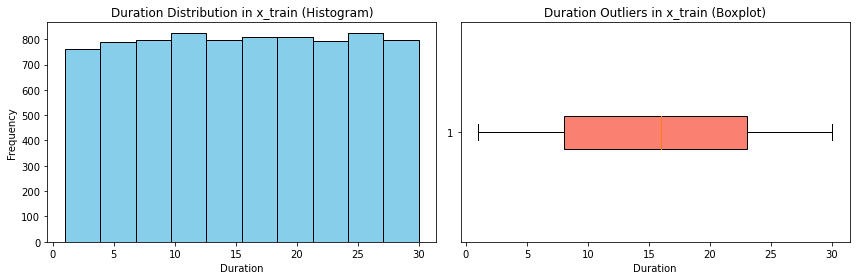

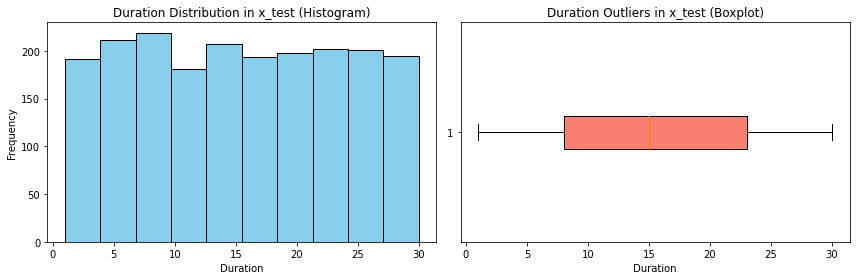

In [317]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(x_train['Duration'], bins = 10, color='skyblue', edgecolor = 'black')
plt.title('Duration Distribution in x_train (Histogram)')
plt.xlabel('Duration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(x_train['Duration'], vert = False, patch_artist = True, boxprops = dict(facecolor = 'salmon'))
plt.title('Duration Outliers in x_train (Boxplot)')
plt.xlabel('Duration')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(x_test['Duration'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Duration Distribution in x_test (Histogram)')
plt.xlabel('Duration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(x_test['Duration'], vert = False, patch_artist = True, boxprops = dict(facecolor = 'salmon'))
plt.title('Duration Outliers in x_test (Boxplot)')
plt.xlabel('Duration')

plt.tight_layout()
plt.show()

Given that the **`Duration`** data exhibits a **normal distribution without any apparent**, it appears suitable for Min-Max scaling

**`Duration`**

In [318]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train['Duration'] = scaler.fit_transform(x_train[['Duration']])
x_train.head()

,Age,Gender,Billing Amount,Admission Type,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
9254,0.014925,1,0.400518,2,0.827586,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1561,0.283582,1,0.931393,2,0.689655,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1670,0.059701,0,0.048019,1,0.137931,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
6087,0.731343,0,0.775821,1,0.482759,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
6669,0.298507,0,0.967237,0,0.379310,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [319]:
x_test['Duration'] = scaler.fit_transform(x_test[['Duration']])
x_test.head()

,Age,Gender,Billing Amount,Admission Type,Duration,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
6252,0.119403,1,0.964362,0,0.413793,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4684,0.925373,0,0.094624,2,0.758621,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1731,0.746269,0,0.507416,1,0.482759,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4742,0.641791,1,0.735396,1,0.862069,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4521,0.895522,1,0.498742,2,0.586207,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# **Modelling**

## *I have attached detailed parameters and their accuracy in Excel*
1. **Bagging Classifier**
- Using default base estimator: Decision Tree
- Using base estimator: SVC
- Using base estimator: KNN
- Using default base estimator: Decision Tree + Hyperparameters Tuning (GridSearchCV)

2. **RandomForest Classifier**
- Using criterion: Gini
- Using criterion: Entropy + Hyperparameters Tuning (GridSearchCV)

3. **Boosting: ADABoost Classifier**
- Using default Hyperparameters
- Using Hyperparameters Tuning (GridSearchCV)

4. **Stacking Classifier**
- Using Default Random Forest + Support Vector Classifier
- Using Random Forest + Support Vector Classifier and Hyperparameters Tuning (GridSearchCV)

**Total : 10**

# **| Bagging Classifier |**

The **initial** choice of employing the **Bagging Classifier with the default Decision Tree** aligns with key objectives in the context of the healthcare dataset. This ensemble method facilitates an insightful investigation into the impact of subsampling on the Decision Tree's performance, offering an **understanding of how varied data subsets influence model** outcomes. Given the intricate nature of healthcare data, characterized by complex interactions among attributes, the Decision Tree's capacity to **capture intricate patterns** makes it a fitting choice. The utilization of Bagging, involving multiple Decision Tree iterations with bootstrapped samples, **introduces diversity among models**, **mitigating overfitting risks**, and thereby **enhancing model robustness**. This approach enables an evaluation of diverse data perspectives, setting the stage for comprehensive insights into how ensemble techniques and subsampling strategies contribute to overall model performance. Subsequently, it lays a solid foundation for informed decisions in subsequent model selections and fine-tuning processes.

## ***Default Base_Estimator: Decision Tree***

In [320]:
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

Bagging_class = BaggingClassifier(oob_score = True, random_state = 42)
Bagging_class.fit(x_train, y_train)

BaggingClassifier(oob_score=True, random_state=42)

In [321]:
Bagging_class.oob_score_

0.3435

The Out-of-Bag (OOB) score in ensemble methods like Bagging Classifier **estimates a model's performance** using **data** that **were not used in training**. It calculates the average prediction accuracy on these out-of-bag samples, providing an indication of how well the model generalizes to unseen data. In your case, an OOB score of **0.3435** signifies the estimated accuracy of the Bagging Classifier on unseen samples, aiding in evaluating the model's predictive capability without requiring a separate validation dataset.

### **Evaluation Metrics**

In [322]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict=Bagging_class.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Classification report
class_report = classification_report(y_test, y_predict)

In [323]:
print('\nConfusion Matrix\n')
print(conf_matrix)


Confusion Matrix

[[278 241 187]
 [258 195 183]
 [272 208 178]]


- For the category labeled as **"Abnormal" (0)**, the model correctly predicted **278** instances. However, it misclassified **241** instances of "Inconclusive" and **187** instances of "Normal" as "Abnormal."
- Concerning the classification denoted as **"Inconclusive" (1)**, the model accurately predicted **195** instances. Yet, it incorrectly classified **258** instances of "Abnormal" and **183** instances of "Normal" as "Inconclusive."
- As for the class identified as **"Normal" (2)**, the model achieved **178** accurate predictions. Nonetheless, it misidentified **272** instances of "Abnormal" and **208** instances of "Inconclusive" as "Normal."

In [324]:
print('\nClassification Report\n')
print(class_report)


Classification Report

              precision    recall  f1-score   support

           0       0.34      0.39      0.37       706
           1       0.30      0.31      0.30       636
           2       0.32      0.27      0.30       658

    accuracy                           0.33      2000
   macro avg       0.32      0.32      0.32      2000
weighted avg       0.32      0.33      0.32      2000



**For Class 0 ("Abnormal"):**
- **Precision:** The model's precision for predicting Class 0 instances is around 0.34, indicating that approximately 34% of the predicted "Abnormal" instances were correct. It misclassified 241 instances of "Inconclusive" and 187 instances of "Normal" as "Abnormal."
- **Recall:** The recall rate for Class 0 is about 0.39, suggesting that the model identified roughly 39% of the actual "Abnormal" instances.
- **F1-score:** The F1-score for Class 0 is approximately 0.37, demonstrating a balance between precision and recall.

**For Class 1 ("Inconclusive"):**
- **Precision:** The precision score for predicting Class 1 instances is around 0.30, implying that about 30% of the predicted "Inconclusive" instances were correct. It misclassified 258 instances of "Abnormal" and 183 instances of "Normal" as "Inconclusive."
- **Recall:** The recall rate for Class 1 is roughly 0.31, indicating that the model identified around 31% of the actual "Inconclusive" instances.
- **F1-score:** The F1-score for Class 1 is approximately 0.30, indicating a balance between precision and recall.

**For Class 2 ("Normal"):**
- **Precision:** The model's precision for Class 2 is about 0.32, meaning that around 32% of the predicted "Normal" instances were correct. It misidentified 272 instances of "Abnormal" and 208 instances of "Inconclusive" as "Normal."
- **Recall:** The recall score for Class 2 is approximately 0.27, implying that the model identified about 27% of the actual "Normal" instances.
- **F1-score:** The F1-score for Class 2 is roughly 0.30, demonstrating a balance between precision and recall.

**Accuracy:** The overall accuracy across all classes is **33%**, indicating that the model **correctly predicted** the classes for approximately **33%** of the total instances in the dataset.

## ***Base_Estimator: SVC***

The decision to **transition** from the default Decision Tree to **Support Vector Classifier (SVC)** as the base estimator within the Bagging ensemble stems from a strategic effort to address potential limitations in capturing complex relationships and non-linear patterns present in the healthcare dataset. SVC offers strengths in **handling intricate data structures** and **non-linearity**, **potentially outperforming** the Decision Tree by leveraging its robustness. Introducing SVC into Bagging aims to diversify the learning approach within the ensemble, minimizing overfitting risks and enhancing the model's ability to generalize to unseen data. This change anticipates an improvement in predictive accuracy by better adapting to the dataset's intricacies and complexities inherent in healthcare-related information.

In [325]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

Bagging_svc = BaggingClassifier(base_estimator=SVC(), oob_score = True, random_state=42)
Bagging_svc.fit(x_train, y_train)

BaggingClassifier(base_estimator=SVC(), oob_score=True, random_state=42)

### **Evaluation Metrics**

In [326]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict=Bagging_svc.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Classification report
class_report = classification_report(y_test, y_predict)

In [327]:
print('\nConfusion Matrix\n')
print(conf_matrix)


Confusion Matrix

[[312 195 199]
 [284 180 172]
 [280 191 187]]


- For the category identified as **"Abnormal" (0)**, the model correctly predicted **312** instances. However, it misclassified **195** instances of "Inconclusive" and **199** instances of "Normal" as "Abnormal."
- Regarding the class denoted as **"Inconclusive" (1)**, the model accurately predicted **180** instances. However, it misclassified **284** instances of "Abnormal" and **172** instances of "Normal" as "Inconclusive."
- As for the classification identified as **"Normal" (2)**, the model correctly predicted **187** instances. Nonetheless, it misclassified **280** instances of "Abnormal" and **191** instances of "Inconclusive" as "Normal."

In [328]:
print('\nClassification Report\n')
print(class_report)


Classification Report

              precision    recall  f1-score   support

           0       0.36      0.44      0.39       706
           1       0.32      0.28      0.30       636
           2       0.34      0.28      0.31       658

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.33      2000
weighted avg       0.34      0.34      0.34      2000



**For Class 0 ("Abnormal"):**
- **Precision:** The precision score for predicting Class 0 instances is around 0.36, indicating that approximately 36% of the predicted "Abnormal" instances were correct.
- **Recall:** The recall rate for Class 0 is roughly 0.44, suggesting that the model identified approximately 44% of the actual "Abnormal" instances.
- **F1-score:** The F1-score for Class 0 is about 0.39, showing a balance between precision and recall.

**For Class 1 ("Inconclusive"):**
- **Precision:** The model's precision for Class 1 instances is around 0.32, implying that about 32% of the predicted "Inconclusive" instances were correct.
- **Recall:** The recall score for Class 1 is approximately 0.28, indicating that the model identified around 28% of the actual "Inconclusive" instances.
- **F1-score:** The F1-score for Class 1 is roughly 0.30, indicating a balance between precision and recall.

**For Class 2 ("Normal"):**
- **Precision:** The precision score for Class 2 is approximately 0.34, meaning that around 34% of the predicted "Normal" instances were correct.
- **Recall:** The recall rate for Class 2 is about 0.28, implying that the model identified about 28% of the actual "Normal" instances.
- **F1-score:** The F1-score for Class 2 is roughly 0.31, demonstrating a balance between precision and recall.

**Accuracy:** The overall accuracy across all classes is **34%**, indicating that the model **correctly predicted** the classes for approximately **34%** of the total instances in the dataset.

## ***Base_Estimator: KNN***

The decision to opt for the **K-Nearest Neighbors (KNN)** algorithm with **n_neighbors = 10**, despite the **identical accuracy** achieved by the previous models **(34%)**, stems from the need to explore a different algorithmic approach. When encountering similar accuracy levels between different models, it's essential to diversify methodologies to grasp the data's underlying structure more comprehensively. KNN, by its nature, works on the principle of similarity and proximity, which might **capture patterns differently** than decision trees or Support Vector Machines (SVMs). By selecting KNN with a moderate number of neighbors, I aim to examine if the data's nuances and relationships are better captured via its proximity-based classification method. This choice allows for a fresh perspective, exploring whether the unique characteristics of the dataset are better understood and represented using the KNN algorithm with a specified number of neighbors.

In [329]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

Bagging_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10), oob_score=True, random_state=42)
Bagging_knn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10),
                  oob_score=True, random_state=42)

### **Evaluation Metrics**

In [330]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict=Bagging_knn.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Classification report
class_report = classification_report(y_test, y_predict)

In [331]:
print('\nConfusion Matrix\n')
print(conf_matrix)


Confusion Matrix

[[266 218 222]
 [237 193 206]
 [219 214 225]]


- For the category labeled as **"Abnormal" (0)**, the model correctly predicted **266** instances. However, it misclassified **218** instances of "Inconclusive" and **222** instances of "Normal" as "Abnormal."
- Regarding the class denoted as **"Inconclusive" (1)**, the model accurately predicted **193** instances. However, it misclassified **237** instances of "Abnormal" and **206** instances of "Normal" as "Inconclusive."
- As for the classification identified as **"Normal" (2)**, the model correctly predicted **225** instances. Nonetheless, it misclassified **219** instances of "Abnormal" and **214** instances of "Inconclusive" as "Normal."

In [332]:
print('\nClassification Report\n')
print(class_report)


Classification Report

              precision    recall  f1-score   support

           0       0.37      0.38      0.37       706
           1       0.31      0.30      0.31       636
           2       0.34      0.34      0.34       658

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000



**For Class 0 ("Abnormal"):**
- **Precision:** The precision score for predicting Class 0 instances is around 0.37, indicating that approximately 37% of the predicted "Abnormal" instances were correct.
- **Recall:** The recall rate for Class 0 is roughly 0.38, suggesting that the model identified approximately 38% of the actual "Abnormal" instances.
- **F1-score:** The F1-score for Class 0 is about 0.37, demonstrating a balance between precision and recall.

**For Class 1 ("Inconclusive"):**
- **Precision:** The model's precision for Class 1 instances is around 0.31, implying that about 31% of the predicted "Inconclusive" instances were correct.
- **Recall:** The recall score for Class 1 is approximately 0.30, indicating that the model identified around 30% of the actual "Inconclusive" instances.
- **F1-score:** The F1-score for Class 1 is roughly 0.31, indicating a balance between precision and recall.

**For Class 2 ("Normal"):**
- **Precision:** The precision score for Class 2 is approximately 0.34, meaning that around 34% of the predicted "Normal" instances were correct.
- **Recall:** The recall rate for Class 2 is about 0.34, implying that the model identified about 34% of the actual "Normal" instances.
- **F1-score:** The F1-score for Class 2 is roughly 0.34, demonstrating a balance between precision and recall.

**Accuracy:** The overall accuracy across all classes is **34%**, indicating that the model **correctly predicted** the classes for approximately **34%** of the total instances in the dataset.

## ***Default Base_Estimator: Decision Tree + Parameter Tuning using GridSearchCV***

The **consistent accuracy of 34%** after **changing the base estimator might indicate** that the inherent complexity of the problem in the dataset is not fully captured by the selected models or their default configurations. This could imply that the dataset might have inherent noise, complexity, or imbalanced class distribution that makes it challenging for these models to learn and generalize well. By performing **hyperparameter tuning** on the **decision tree with Bagging**, I aim to explore if altering the ensemble size ('n_estimators'), the sample size per estimator ('max_samples'), or the number of features considered ('max_features') could yield improvements in model performance. The goal is to address potential underfitting or overfitting issues by adjusting these parameters and potentially enhance the model's ability to discern patterns in the dataset, which could lead to an improved accuracy score.

In [333]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Default: Decision Tree
Bagging_GridSearch = BaggingClassifier(oob_score=True, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],   # number of estimators
    'max_samples' : [0.5, 0.7, 1.0],  # random sample size for each estimator
    'max_features': [0.5, 0.7, 1.0]   # number of features considered
}

In [334]:
grid_search = GridSearchCV(Bagging_GridSearch, param_grid, cv=3)
grid_search.fit(x_train, y_train)

best_bagging_model = grid_search.best_estimator_
best_bagging_model.fit(x_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=200,
                  oob_score=True, random_state=42)

In [335]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 200}


The best parameters obtained after hyperparameter tuning for the decision tree with Bagging are **'max_features': 0.7, 'max_samples': 0.7, and 'n_estimators': 200**. These optimal parameters suggest that using **70%** of the features for each estimator, taking a **70%** random sample size for each estimator, and employing a total of **200 estimators** in the Bagging ensemble were found to provide the best performance among the specified parameter options. This combination was identified as the most suitable configuration during the tuning process, likely resulting in improved model performance compared to other parameter combinations tested.

### **Evaluation Metrics**

In [336]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict = best_bagging_model.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Classification report
class_report = classification_report(y_test, y_predict)

In [337]:
print('\nConfusion Matrix\n')
print(conf_matrix)


Confusion Matrix

[[278 208 220]
 [267 199 170]
 [236 203 219]]


- For the category labeled as **"Abnormal" (0)**, the model correctly predicted **278** instances. However, it misclassified **208** instances of "Inconclusive" and **220** instances of "Normal" as "Abnormal."
- Regarding the class denoted as **"Inconclusive" (1)**, the model accurately predicted **199** instances. However, it misclassified **267** instances of "Abnormal" and **170** instances of "Normal" as "Inconclusive."
- As for the classification identified as **"Normal" (2)**, the model correctly predicted **219** instances. Nonetheless, it misclassified **236** instances of "Abnormal" and **203** instances of "Inconclusive" as "Normal."

In [338]:
print('\nClassification Report\n')
print(class_report)


Classification Report

              precision    recall  f1-score   support

           0       0.36      0.39      0.37       706
           1       0.33      0.31      0.32       636
           2       0.36      0.33      0.35       658

    accuracy                           0.35      2000
   macro avg       0.35      0.35      0.35      2000
weighted avg       0.35      0.35      0.35      2000



**For Class 0 ("Abnormal"):**
- **Precision:** The precision score for predicting Class 0 instances is approximately 0.36, indicating that around 36% of the predicted "Abnormal" instances were correct.
- **Recall:** The recall rate for Class 0 is roughly 0.39, suggesting that the model identified approximately 39% of the actual "Abnormal" instances.
- **F1-score:** The F1-score for Class 0 is about 0.37, demonstrating a balance between precision and recall.

**For Class 1 ("Inconclusive"):**
- **Precision:** The precision for Class 1 instances is around 0.33, implying that about 33% of the predicted "Inconclusive" instances were correct.
- **Recall:** The recall score for Class 1 is approximately 0.31, indicating that the model identified around 31% of the actual "Inconclusive" instances.
- **F1-score:** The F1-score for Class 1 is roughly 0.32, indicating a balance between precision and recall.

**For Class 2 ("Normal"):**
- **Precision:** The precision score for Class 2 is about 0.36, meaning that approximately 36% of the predicted "Normal" instances were correct.
- **Recall:** The recall rate for Class 2 is around 0.33, implying that the model identified about 33% of the actual "Normal" instances.
- **F1-score:** The F1-score for Class 2 is approximately 0.35, demonstrating a balance between precision and recall.

**Accuracy:** The overall accuracy across all classes is **35%**, indicating that the model **correctly predicted** the classes for approximately **35%** of the total instances in the dataset. The macro and weighted average metrics for precision, recall, and F1-score are also around 0.35, highlighting the consistent performance across classes.

The hyperparameter tuning performed on the decision tree classifier resulted in an **improved accuracy of 35%**, compared to the previous accuracy of **34%** achieved by the previous base estimator. This enhancement in performance demonstrates the effectiveness of optimizing the decision tree's hyperparameters using techniques like GridSearchCV. By fine-tuning parameters like 'max_features,' 'max_samples,' and 'n_estimators,' the model becomes better suited to capture the underlying patterns in the dataset, which consequently leads to an enhancement in predictive accuracy.

# **| Random Forest Classifier |**

Transitioning from Bagging to **Random Forest Classifier** is a strategic move to potentially **enhance** the model's predictive **accuracy and robustness**. Random Forest is an ensemble learning method, extending from Bagging, yet introducing further randomness by considering a subset of features at each split. This technique aims to improve generalization by creating a diverse set of decision trees. The concept of randomness in feature selection and bootstrapped samples across multiple trees **enhances** the **model's adaptability** to various features and underlying patterns in the dataset. Moreover, by aggregating predictions from numerous trees, Random Forest tends to yield **more stable** and **reliable predictions**, thus potentially **elevating** the **overall accuracy** and performance of the model.

## ***Criterion: Gini***

In [339]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini', max_depth=10, random_state=42)
RF_class.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

The choice of **'gini'** as the criterion and setting **'max_depth'** to **10** for the Random Forest Classifier aligns with the characteristics of the healthcare dataset. The 'gini' criterion is preferred for its effectiveness in constructing decision trees by evaluating the **impurity** of a split. In the context of healthcare data, this criterion helps the model **better discern** and **classify** instances based on their features, particularly relevant when dealing with intricate and varied patient conditions. Setting 'max_depth' to 10 controls the depth of individual decision trees within the ensemble. This depth limitation aims to **restrict the trees** from becoming excessively complex, promoting better generalization to unseen data while still allowing for capturing essential patterns present in healthcare-related features.

### **Evaluation Metrics**

In [340]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict=RF_class.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Classification report
class_report = classification_report(y_test, y_predict)

In [341]:
print('\nConfusion Matrix\n')
print(conf_matrix)


Confusion Matrix

[[296 209 201]
 [273 193 170]
 [269 189 200]]


- For the class labeled as **"Abnormal" (0)**, the model correctly predicted **296** instances. However, it misclassified **209** instances of "Inconclusive" and **201** instances of "Normal" as "Abnormal."
- Concerning the category denoted as **"Inconclusive" (1)**, the model accurately predicted **193** instances. However, it misclassified **273** instances of "Abnormal" and **170** instances of "Normal" as "Inconclusive."
- As for the classification identified as **"Normal" (2)**, the model correctly predicted **200** instances. Nonetheless, it misclassified **269** instances of "Abnormal" and **189** instances of "Inconclusive" as "Normal."

In [342]:
print('\nClassification Report\n')
print(class_report)


Classification Report

              precision    recall  f1-score   support

           0       0.35      0.42      0.38       706
           1       0.33      0.30      0.31       636
           2       0.35      0.30      0.33       658

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000



**For Class 0 ("Abnormal"):**
- **Precision:** The precision score for predicting Class 0 instances is approximately 0.35, indicating that around 35% of the predicted "Abnormal" instances were correct.
- **Recall:** The recall rate for Class 0 is roughly 0.42, suggesting that the model identified approximately 42% of the actual "Abnormal" instances.
- **F1-score:** The F1-score for Class 0 is about 0.38, demonstrating a balance between precision and recall.

**For Class 1 ("Inconclusive"):**
- **Precision:** The precision for Class 1 instances is around 0.33, implying that about 33% of the predicted "Inconclusive" instances were correct.
- **Recall:** The recall score for Class 1 is approximately 0.30, indicating that the model identified around 30% of the actual "Inconclusive" instances.
- **F1-score:** The F1-score for Class 1 is roughly 0.31, indicating a balance between precision and recall.

**For Class 2 ("Normal"):**
- **Precision:** The precision score for Class 2 is approximately 0.35, meaning that approximately 35% of the predicted "Normal" instances were correct.
- **Recall:** The recall rate for Class 2 is around 0.30, implying that the model identified about 30% of the actual "Normal" instances.
- **F1-score:** The F1-score for Class 2 is approximately 0.33, demonstrating a balance between precision and recall.

**Accuracy:** The overall accuracy across all classes is **34%**, indicating that the model **correctly predicted** the classes for approximately **34%** of the total instances in the dataset. The macro and weighted average metrics for precision, recall, and F1-score are also around 0.34, highlighting the consistent performance across classes.

## ***Hyperparameter Tuning using GridSearchCV***

After employing a random forest classifier using the Gini criterion and a max depth of 10, the accuracy observed a **slight decrease** from the previous modeling, **dropping** from **0.35 to 0.34**. To address this decline and enhance the model's performance, I've chosen to **utilize GridSearchCV**. This method will systematically explore a range of hyperparameters, enabling an exhaustive search to identify the best configuration. By leveraging GridSearchCV, I aim to optimize the model's parameters, considering various combinations to **attain improved accuracy** and overall performance for the random forest classifier.

In [355]:
from sklearn.model_selection import GridSearchCV

RF_GridSearchCV = RandomForestClassifier(random_state=42)

param_grid = {
               'criterion'   : ['gini', 'entropy', 'log_loss'],
               'max_depth'   : [5, 10], 
               'n_estimators': [100, 125],       # number of estimators
               'max_samples' : [0.7, 1.0],       # random sample size for each estimator
}

I chose specific hyperparameters for GridSearchCV to explore the impact on the model's performance. This included evaluating different **criteria** ('gini', 'entropy', 'log_loss') for node splitting, varying **tree depths** (5 and 10), examining the **number of estimators** (100 and 125), and testing **sample sizes** (0.7 and 1.0) for each estimator. The goal is to find the most effective hyperparameter combination for maximizing accuracy and model generalization.

In [356]:
grid_search = GridSearchCV(RF_GridSearchCV, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_bagging_model = grid_search.best_estimator_
best_bagging_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_samples=0.7,
                       n_estimators=125, random_state=42)

In [357]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_samples': 0.7, 'n_estimators': 125}


The best parameters obtained after hyperparameter tuning using GridSearchCV are **{'criterion': 'entropy', 'max_depth': 10, 'max_samples': 0.7, 'n_estimators': 125}**. These parameters were identified as they collectively yielded the highest performance and accuracy for the Random Forest Classifier model.

### **Evaluation Metrics**

In [358]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict = best_bagging_model.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Classification report
class_report = classification_report(y_test, y_predict)

In [359]:
print('\nConfusion Matrix\n')
print(conf_matrix)


Confusion Matrix

[[312 213 181]
 [285 185 166]
 [277 193 188]]


- For the class labeled as **"Abnormal" (0)**, the model correctly predicted **312** instances. However, it misclassified **213** instances of "Inconclusive" and **181** instances of "Normal" as "Abnormal."
- Regarding the category denoted as **"Inconclusive" (1)**, the model accurately predicted **185** instances. However, it misclassified **285** instances of "Abnormal" and **166** instances of "Normal" as "Inconclusive."
- As for the classification identified as **"Normal" (2)**, the model correctly predicted **188** instances. Nonetheless, it misclassified **277** instances of "Abnormal" and **193** instances of "Inconclusive" as "Normal."

In [360]:
print('\nClassification Report\n')
print(class_report)


Classification Report

              precision    recall  f1-score   support

           0       0.36      0.44      0.39       706
           1       0.31      0.29      0.30       636
           2       0.35      0.29      0.32       658

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000



**For Class 0 ("Abnormal"):**
- **Precision:** The precision score for predicting Class 0 instances is approximately 0.36, indicating that around 36% of the predicted "Abnormal" instances were correct.
- **Recall:** The recall rate for Class 0 is roughly 0.44, suggesting that the model identified approximately 44% of the actual "Abnormal" instances.
- **F1-score:** The F1-score for Class 0 is about 0.39, demonstrating a balance between precision and recall.

**For Class 1 ("Inconclusive"):**
- **Precision:** The precision for Class 1 instances is around 0.31, implying that about 31% of the predicted "Inconclusive" instances were correct.
- **Recall:** The recall score for Class 1 is approximately 0.29, indicating that the model identified around 29% of the actual "Inconclusive" instances.
- **F1-score:** The F1-score for Class 1 is roughly 0.30, indicating a balance between precision and recall.

**For Class 2 ("Normal"):**
- **Precision:** The precision score for Class 2 is approximately 0.35, meaning that around 35% of the predicted "Normal" instances were correct.
- **Recall:** The recall rate for Class 2 is around 0.29, implying that the model identified about 29% of the actual "Normal" instances.
- **F1-score:** The F1-score for Class 2 is approximately 0.32, demonstrating a balance between precision and recall.

**Accuracy:** The overall accuracy across all classes is **34%**, indicating that the model **correctly predicted** the classes for approximately **34%** of the total instances in the dataset. The macro and weighted average metrics for precision, recall, and F1-score are also around 0.34, highlighting the consistent performance across classes.

# **| Boosting: ADABoost Classifier|**

The evaluation of the Random Forest Classifier **showed no improvement** in accuracy despite hyperparameter tuning, maintaining a **consistent 0.34 accuracy**. This suggests the model might have reached its learning limit regarding the dataset's complexities.

Transitioning to boosting techniques is a strategic move in response. Boosting algorithms like **AdaBoost** work sequentially to improve predictive performance by focusing on previously misclassified instances. This decision aligns with the need to explore different methodologies when models hit performance plateaus, potentially leveraging boosting's iterative nature to enhance accuracy beyond what was achieved with Random Forests.

## ***Default Parameters***

In [361]:
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

ADABoost_class = AdaBoostClassifier(random_state=42)
ADABoost_class.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

### **Evaluation Metrics**

In [362]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict=ADABoost_class.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Classification report
class_report = classification_report(y_test, y_predict)

In [363]:
print('\nConfusion Matrix\n')
print(conf_matrix)


Confusion Matrix

[[289 250 167]
 [295 180 161]
 [296 208 154]]


- For the class labeled as **"Abnormal" (0)**, the model correctly predicted **289** instances. However, it misclassified **250** instances of "Inconclusive" and **167** instances of "Normal" as "Abnormal."
- Regarding the category denoted as **"Inconclusive" (1)**, the model accurately predicted **180** instances. However, it misclassified **295** instances of "Abnormal" and **161** instances of "Normal" as "Inconclusive."
- As for the classification identified as **"Normal" (2)**, the model correctly predicted **154** instances. Nonetheless, it misclassified **296** instances of "Abnormal" and **208** instances of "Inconclusive" as "Normal."

In [364]:
print('\nClassification Report\n')
print(class_report)


Classification Report

              precision    recall  f1-score   support

           0       0.33      0.41      0.36       706
           1       0.28      0.28      0.28       636
           2       0.32      0.23      0.27       658

    accuracy                           0.31      2000
   macro avg       0.31      0.31      0.31      2000
weighted avg       0.31      0.31      0.31      2000



**For Class 0 ("Abnormal"):**
- **Precision:** The precision score for predicting Class 0 instances is approximately 0.33, indicating that around 33% of the predicted "Abnormal" instances were correct.
- **Recall:** The recall rate for Class 0 is roughly 0.41, suggesting that the model identified approximately 41% of the actual "Abnormal" instances.
- **F1-score:** The F1-score for Class 0 is about 0.36, demonstrating a balance between precision and recall.

**For Class 1 ("Inconclusive"):**
- **Precision:** The precision for Class 1 instances is around 0.28, implying that about 28% of the predicted "Inconclusive" instances were correct.
- **Recall:** The recall score for Class 1 is approximately 0.28, indicating that the model identified around 28% of the actual "Inconclusive" instances.
- **F1-score:** The F1-score for Class 1 is roughly 0.28, indicating a balance between precision and recall.

**For Class 2 ("Normal"):**
- **Precision:** The precision score for Class 2 is approximately 0.32, meaning that around 32% of the predicted "Normal" instances were correct.
- **Recall:** The recall rate for Class 2 is around 0.23, implying that the model identified about 23% of the actual "Normal" instances.
- **F1-score:** The F1-score for Class 2 is approximately 0.27, demonstrating a balance between precision and recall.

**Accuracy:** The overall accuracy across all classes is **31%**, indicating that the model **correctly predicted** the classes for approximately **31%** of the total instances in the dataset. The macro and weighted average metrics for precision, recall, and F1-score are also around 0.31, showing consistent performance across classes.

## ***Hyperparameter Tuning using GridSearchCV***

In [365]:
from sklearn.model_selection import GridSearchCV

ADABoost_GridSearchCV = AdaBoostClassifier(random_state=42)

param_grid = {
                'n_estimators': [50, 100, 200],   # number of estimators
                'learning_rate': [0.1, 0.5, 1.0]  # weight applied to each classifier at each boosting iteration
}

The parameters used for AdaBoostClassifier are 'n_estimators' (representing the number of estimators) and 'learning_rate' (which controls the contribution of each classifier). **'n_estimators'** varied between **50, 100, and 200**, while **'learning_rate'** was tested with values **0.1, 0.5, and 1.0**.

In [366]:
grid_search = GridSearchCV(ADABoost_GridSearchCV, param_grid, cv=3)
grid_search.fit(x_train, y_train)

best_adaboost_model = grid_search.best_estimator_
best_adaboost_model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.5, random_state=42)

In [367]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}


The best parameters found for the AdaBoostClassifier were **'learning_rate'** set to **0.5** and **'n_estimators'** set to **50** after performing the grid search.

### **Evaluation Metrics**

In [368]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict = best_adaboost_model.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Classification report
class_report = classification_report(y_test, y_predict)

In [369]:
print('\nConfusion Matrix\n')
print(conf_matrix)


Confusion Matrix

[[362 236 108]
 [356 176 104]
 [341 197 120]]


- For the class labeled as **"Abnormal" (0)**, the model correctly predicted **362** instances. However, it misclassified **236** instances of "Inconclusive" and **108** instances of "Normal" as "Abnormal."
- Regarding the category denoted as **"Inconclusive" (1)**, the model accurately predicted **176** instances. However, it misclassified **356** instances of "Abnormal" and **104** instances of "Normal" as "Inconclusive."
- As for the classification identified as **"Normal" (2)**, the model correctly predicted **120** instances. Nonetheless, it misclassified **341** instances of "Abnormal" and **197** instances of "Inconclusive" as "Normal."

In [370]:
print('\nClassification Report\n')
print(class_report)


Classification Report

              precision    recall  f1-score   support

           0       0.34      0.51      0.41       706
           1       0.29      0.28      0.28       636
           2       0.36      0.18      0.24       658

    accuracy                           0.33      2000
   macro avg       0.33      0.32      0.31      2000
weighted avg       0.33      0.33      0.31      2000



**For Class 0 ("Abnormal"):**
- **Precision:** The precision score for predicting Class 0 instances is approximately 0.34, indicating that around 34% of the predicted "Abnormal" instances were correct.
- **Recall:** The recall rate for Class 0 is roughly 0.51, suggesting that the model identified approximately 51% of the actual "Abnormal" instances.
- **F1-score:** The F1-score for Class 0 is about 0.41, demonstrating a balance between precision and recall.

**For Class 1 ("Inconclusive"):**
- **Precision:** The precision for Class 1 instances is around 0.29, implying that about 29% of the predicted "Inconclusive" instances were correct.
- **Recall:** The recall score for Class 1 is approximately 0.28, indicating that the model identified around 28% of the actual "Inconclusive" instances.
- **F1-score:** The F1-score for Class 1 is roughly 0.28, indicating a balance between precision and recall.

**For Class 2 ("Normal"):**
- **Precision:** The precision score for Class 2 is approximately 0.36, meaning that around 36% of the predicted "Normal" instances were correct.
- **Recall:** The recall rate for Class 2 is around 0.18, implying that the model identified about 18% of the actual "Normal" instances.
- **F1-score:** The F1-score for Class 2 is approximately 0.24, demonstrating a balance between precision and recall.

**Accuracy:** The overall accuracy across all classes is **33%**, indicating that the model **correctly predicted** the classes for approximately **33%** of the total instances in the dataset. The macro and weighted average metrics for precision, recall, and F1-score are also around 0.31 to 0.33, showing somewhat consistent performance across classes, albeit with varying precision and recall rates.

# **| Stacking Classifier|**

Considering the decline in accuracy with boosting from **34% to 33%**, I'm exploring a new approach called stacking. Stacking involves combining models like **Random Forest Classifier and SVC**, both showing promise individually. This strategy aims to leverage their strengths collectively and potentially improve accuracy. This shift aligns with the pursuit of maximizing model performance by amalgamating diverse models to overcome limitations encountered with individual ones.

### ***Using Default Random Forest + Support Vector Classifier***

In [371]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

estimators = [
                ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
                ('svc', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))
]

stacking_class = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_class.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svc',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

### **Evaluation Metrics**

In [372]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict=stacking_class.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Classification report
class_report = classification_report(y_test, y_predict)

In [373]:
print('\nConfusion Matrix\n')
print(conf_matrix)


Confusion Matrix

[[506 137  63]
 [442 131  63]
 [461 138  59]]


- For the class labeled as **"Abnormal" (0)**, the model correctly predicted **506** instances. However, it misclassified **137** instances of "Inconclusive" and **63** instances of "Normal" as "Abnormal."
- Regarding the category denoted as **"Inconclusive" (1)**, the model accurately predicted **131** instances. However, it misclassified **442** instances of "Abnormal" and **63** instances of "Normal" as "Inconclusive."
- As for the classification identified as **"Normal" (2)**, the model correctly predicted **59** instances. Nonetheless, it misclassified **461** instances of "Abnormal" and **138** instances of "Inconclusive" as "Normal."

In [374]:
print('\nClassification Report\n')
print(class_report)


Classification Report

              precision    recall  f1-score   support

           0       0.36      0.72      0.48       706
           1       0.32      0.21      0.25       636
           2       0.32      0.09      0.14       658

    accuracy                           0.35      2000
   macro avg       0.33      0.34      0.29      2000
weighted avg       0.33      0.35      0.29      2000



**For Class 0 ("Abnormal"):**
- **Precision:** The precision score for predicting Class 0 instances is approximately 0.36, indicating that around 36% of the predicted "Abnormal" instances were correct.
- **Recall:** The recall rate for Class 0 is roughly 0.72, suggesting that the model identified approximately 72% of the actual "Abnormal" instances.
- **F1-score:** The F1-score for Class 0 is about 0.48, demonstrating a balance between precision and recall.

**For Class 1 ("Inconclusive"):**
- **Precision:** The precision for Class 1 instances is around 0.32, implying that about 32% of the predicted "Inconclusive" instances were correct.
- **Recall:** The recall score for Class 1 is approximately 0.21, indicating that the model identified around 21% of the actual "Inconclusive" instances.
- **F1-score:** The F1-score for Class 1 is roughly 0.25, indicating a balance between precision and recall.

**For Class 2 ("Normal"):**
- **Precision:** The precision score for Class 2 is approximately 0.32, meaning that around 32% of the predicted "Normal" instances were correct.
- **Recall:** The recall rate for Class 2 is around 0.09, implying that the model identified about 9% of the actual "Normal" instances.
- **F1-score:** The F1-score for Class 2 is approximately 0.14, demonstrating a balance between precision and recall.

**Accuracy:** The overall accuracy across all classes is **35%**, indicating that the model **correctly predicted** the classes for approximately **35%** of the total instances in the dataset. The macro and weighted average metrics for precision, recall, and F1-score vary, averaging around 0.29 to 0.35, showing different levels of performance across classes. The model performed best in identifying "Abnormal" instances (Class 0) compared to the other classes.

### ***Using GridSearchCV for Random Forest + Support Vector Classifier Tuning***

In [375]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

estimators = [
                ('rf', RandomForestClassifier(n_estimators=10)),
                ('svc', make_pipeline(StandardScaler(), LinearSVC()))
]

In [376]:
stacking_class = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

param_grid = {
                'final_estimator__C': [1.0, 10.0],   # Parameters for final estimator (Default: Logistic Regression)
                'rf__n_estimators'  : [50, 100],     # Parameters for RandomForestClassifier
                'svc__linearsvc__C' : [1.0, 10.0]    # Parameters for LinearSVC
}

In [377]:
grid_search = GridSearchCV(stacking_class, param_grid, cv=3)
grid_search.fit(x_train, y_train)

best_stacking_model = grid_search.best_estimator_
best_stacking_model.fit(x_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('svc',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(C=10.0))]))],
                   final_estimator=LogisticRegression(C=10.0))

In [378]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'final_estimator__C': 10.0, 'rf__n_estimators': 100, 'svc__linearsvc__C': 10.0}


### **Evaluation Metrics**

In [379]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict = best_stacking_model.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Classification report
class_report = classification_report(y_test, y_predict)

In [382]:
print('\nConfusion Matrix\n')
print(conf_matrix)


Confusion Matrix

[[494  78 134]
 [446  75 115]
 [438  92 128]]


- For the class labeled as **"Abnormal" (0)**, the model correctly predicted **494** instances. However, it misclassified **78** instances of "Inconclusive" and **134** instances of "Normal" as "Abnormal."
- Regarding the category denoted as **"Inconclusive" (1)**, the model accurately predicted **75** instances. However, it misclassified **446** instances of "Abnormal" and **115** instances of "Normal" as "Inconclusive."
- As for the classification identified as **"Normal" (2)**, the model correctly predicted **128** instances. Nonetheless, it misclassified **438** instances of "Abnormal" and **92** instances of "Inconclusive" as "Normal."

In [383]:
print('\nClassification Report\n')
print(class_report)


Classification Report

              precision    recall  f1-score   support

           0       0.36      0.70      0.47       706
           1       0.31      0.12      0.17       636
           2       0.34      0.19      0.25       658

    accuracy                           0.35      2000
   macro avg       0.33      0.34      0.30      2000
weighted avg       0.34      0.35      0.30      2000



**For Class 0 ("Abnormal"):**
- **Precision:** The precision score for predicting Class 0 instances is approximately 0.36, indicating that around 36% of the predicted "Abnormal" instances were correct.
- **Recall:** The recall rate for Class 0 is roughly 0.70, suggesting that the model identified approximately 70% of the actual "Abnormal" instances.
- **F1-score:** The F1-score for Class 0 is about 0.47, demonstrating a balance between precision and recall.

**For Class 1 ("Inconclusive"):**
- **Precision:** The precision for Class 1 instances is around 0.31, implying that about 31% of the predicted "Inconclusive" instances were correct.
- **Recall:** The recall score for Class 1 is approximately 0.12, indicating that the model identified around 12% of the actual "Inconclusive" instances.
- **F1-score:** The F1-score for Class 1 is roughly 0.17, indicating a balance between precision and recall.

**For Class 2 ("Normal"):**
- **Precision:** The precision score for Class 2 is approximately 0.34, meaning that around 34% of the predicted "Normal" instances were correct.
- **Recall:** The recall rate for Class 2 is around 0.19, implying that the model identified about 19% of the actual "Normal" instances.
- **F1-score:** The F1-score for Class 2 is approximately 0.25, demonstrating a balance between precision and recall.

**Accuracy:** The overall accuracy across all classes is **35%**, indicating that the model **correctly predicted** the classes for approximately **35%** of the total instances in the dataset. The macro and weighted average metrics for precision, recall, and F1-score vary, averaging around 0.30 to 0.35, showing different levels of performance across classes. The model performed best in identifying "Abnormal" instances (Class 0) compared to the other classes.

# **Conclusion**

Based on the experimentation conducted, I've observed that both **Bagging Classifier**, utilizing Decision Tree as the base estimator with hyperparameter tuning (n_estimators = 100, max_samples = 0.7, max_features = 0.7), and **Stacking**, incorporating Random Forest and SVC with hyperparameter tuning, yielded the highest accuracy of **0.35** among the various modeling approaches tested. Despite applying **min-max scaling** for normalization, it **didn't notably impact** the models' accuracy. Hence, it appears that normalization isn't a critical factor for enhancing the performance of these models on this dataset.

The effectiveness of Bagging Classifier and Stacking in achieving the **highest accuracy** might be attributed to their **ensemble nature**. Bagging, by aggregating multiple models, leverages the diversity of individual estimators to improve overall performance by **reducing variance**. On the other hand, Stacking combines the predictions of diverse base models using a meta-estimator, enabling it to **capture more complex relationships** within the data. The synergy between different models in these ensemble techniques likely contributes to their ability to capture varied patterns and generalize well, **resulting in higher accuracy** compared to standalone models.

**In summary**, despite exploring normalization techniques which didn't notably influence model accuracy, ensemble methods such as Bagging Classifier and Stacking, leveraging diverse models and combining their outputs, emerged as the most effective approaches, achieving the highest accuracy of 0.35. These techniques demonstrate their capability to collectively harness the strengths of individual models and produce more robust and accurate predictions for this specific dataset.